# Week-2: Python & Frequency Analysis

This week we will explore frequency content of signals. **Fourier transform** is widely used in signal processing. We will be using **JupyterLab** interactive environment with **Python** to accomplish this task. 

# Introduction to Python

This lab first contains a quick overview of Python fundamentals that we need throughout all remaining labs. They call Python as a "**batteries included**" language - it has a number of useful libraries that are both powerful and optimized. We will look at Python libraries like numpy, scipy, etc., as well. Let's start with our lab environment Jupyter Notebook. 

## Jupyter Notebook
Jupyter Notebook is a powerful tool that enables you to interact with data rapidly. A notebook consists of cells. Each cell either contains **text or code**. Text is in **markdown** format, and code is in **Python** language. 

### Running code

To run a code cell, 
* press the play button or
* hit ctrl+enter (stay at the same cell) or
* hit shift+enter (advances to the next cell)

### Changing text
To change text in text cell, by double clicking the cell.

### Adding a new cell
To add a new cell, either 
* select Insert menu item or 
* click plus button. 

### Interrupting the kernel
If you think a process is running long, you can interrupt it by pressing the stop button. 

In [ ]:
import time

while(1):
    print("error")
    time.sleep(1)

### Restarting the kernels
If interrupting does not work, you can reset the state by restarting the kernel. Just click restart button in the toolbar. This will clear all variables. 

### Saving the notebook
To save the notebook either 
* select File->Save... or
* hit ctrl+s 

### Running terminal commands
You can run terminal commands inside your notebook by placing an **exclamation mark** at the begining of the command. 

In [ ]:
!dir


### Measuring time
You can measure execution time by **%%time**. 

In [1]:
%%time
nums = [i**2 for i in range(1000000)]

CPU times: total: 15.6 ms
Wall time: 74.6 ms


## Python Libraries
We will be using many Python libraries during the labs. Here is the list: 
* numpy
* SciPy
* matplotlib
* PyAudio
* pyrtlsdr
### Importing libraries
By convention numpy is imported as **np** and pyplot is imported as **plt**. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

## Data Types
### String
Use single/double quotes which are the same. You can concatenate strings with '+'. 

In [2]:
# comment line
"Welcome to " + 'the Python Lab!'

'Welcome to the Python Lab!'

### Tuple
A tuple is an unmutable list. It is created using '()'. 

In [6]:
t = ('D', 'S', 'P') + (1, 0, 1)
print(t, len(t))
# don't worry you will get error in the next line!
t[3] = 4

('D', 'S', 'P', 1, 0, 1) 6


TypeError: 'tuple' object does not support item assignment

### List
A list is similar to tuple but it is mutable. Use '[]' to create a list. 

In [4]:
l = ['D', 'S', 'P'] + [1, 0, 1]
print(l, len(l))
# now we can change data
l[3] = 4
print(l, len(l))

['D', 'S', 'P', 1, 0, 1] 6
['D', 'S', 'P', 4, 0, 1] 6


### Numpy array
Numpy array is similar to list but it can contain only one data type, it can be multidimensional and it supports vector operations as we will see. 

In [2]:
# create 2x2 matrix of float32 type
x = np.array([[1, 2], [3, 4]], dtype=np.float32)
print("x=\n", x)
# itemsize property shows the number of bytes each item occupies
print("Itemsize=", x.itemsize)
# shape property gives information about dimensions
print("shape=",x.shape)

x=
 [[1. 2.]
 [3. 4.]]
Itemsize= 4
shape= (2, 2)


In [3]:
# elementwise operations
print('adding 2')
print(x+2)
print('multiplying by 3')
print(x*3)
print('multiplying by itself')
print(x*x)
print('squaring')
print(x**2)
print('log10')
print(np.log10(x))

adding 2
[[3. 4.]
 [5. 6.]]
multiplying by 3
[[ 3.  6.]
 [ 9. 12.]]
multiplying by itself
[[ 1.  4.]
 [ 9. 16.]]
squaring
[[ 1.  4.]
 [ 9. 16.]]
log10
[[0.         0.30103   ]
 [0.47712126 0.60206   ]]


In [4]:
# all below do matrix multiplication
print('matrix multiplication')
np.matrix(x) * np.matrix(x)
x @ x
x.dot(x)
np.dot(x, x)
np.matmul(x, x)

matrix multiplication


array([[ 7., 10.],
       [15., 22.]], dtype=float32)

### Slicing
You can slice a numpy array without creating a copy. Slicing creates a view only where this is really fast operation. 

[start:stop:step]

In [5]:
x = np.array([1,2,3,4,5,6,7,8])
print(x, len(x))
y = x[:4]
print(y, len(y))
# changing y changes x, too. 
y[0] = 9
print(x)


[1 2 3 4 5 6 7 8] 8
[1 2 3 4] 4
[9 2 3 4 5 6 7 8]


In [6]:
# use copy to make an external copy
y = x[5:].copy()
print(y)
y[0] = 10
print(y)
print(x)

[6 7 8]
[10  7  8]
[9 2 3 4 5 6 7 8]


### numpy r_
Creates numpy array starting from "start" until "stop", i.e. range [start, stop) with "step" increments. 

In [7]:
print(np.r_[:10:.1])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


## Plotting
We will use matplolib.pyplot library to plot. To display the plots inside the browser, we can use the command 
`%matplotlib inline` (display plots as png files) or `%matplotlib notebook` (generate an interactive canvas)

In [8]:
# Generate signals
x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

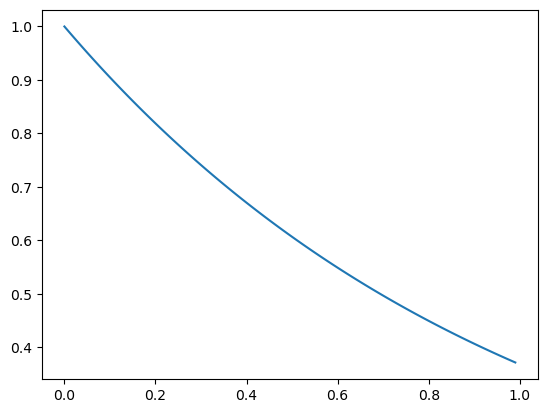

In [9]:
# plotting one signal
plt.figure()
plt.plot( x, y1 )

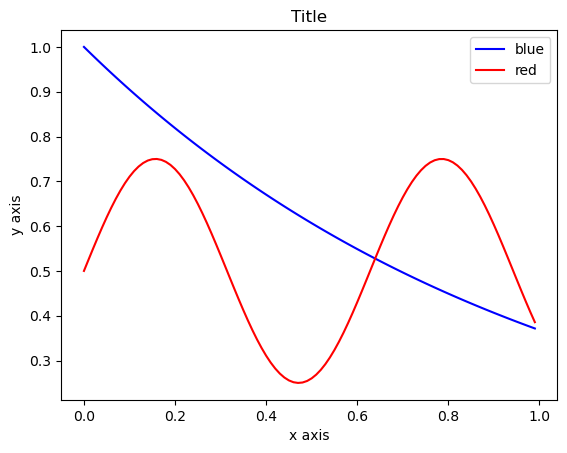

In [10]:
# plotting multiple signals in one figure
plt.figure()
plt.plot( x, y1, "b" )
plt.plot( x, y2, "r" )
plt.xlabel( "x axis" )
plt.ylabel( "y axis" )

plt.title( "Title" )

plt.legend( ("blue", "red") )

### Adding interaction to your plots
Leveraging the Jupyter interactive widgets framework, `ipympl` enables the interactive features of matplotlib in the Jupyter notebook and in JupyterLab.

To enable the ipympl backend, simply use the matplotlib Jupyter magic:

    %matplotlib widget

Install it with `conda install -c conda-forge ipympl` 

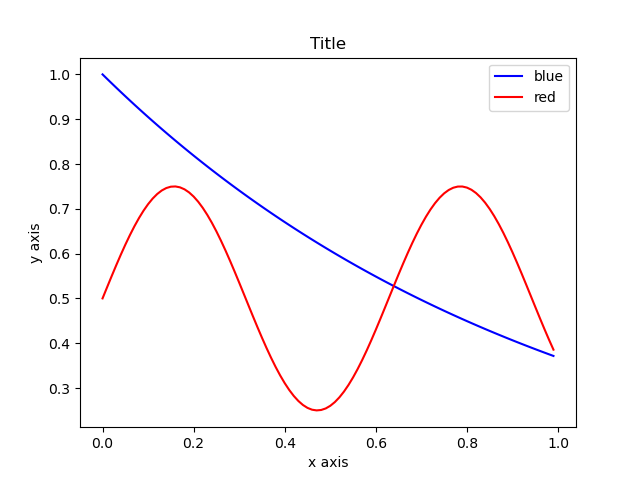

In [11]:
%matplotlib widget
plt.figure()
plt.plot( x, y1, "b" )
plt.plot( x, y2, "r" )
plt.xlabel( "x axis" )
plt.ylabel( "y axis" )

plt.title( "Title" )

plt.legend( ("blue", "red") )

In [13]:
# plot in browser instead of opening new windows
%matplotlib inline
plt.figure()
plt.plot( x, y1, "b" )
plt.plot( x, y2, "r" )
plt.xlabel( "x axis" )
plt.ylabel( "y axis" )

plt.title( "Title" )

plt.legend( ("blue", "red") )

### Suppressing output
To get rid of unnecessary output after command execution, use a semicolon at the end of the statement. 

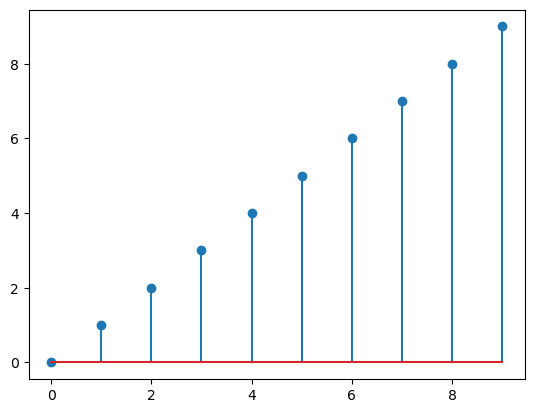

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure()
plt.stem(np.r_[:10]);

# Fast Fourier Transform

Fourier transform is widely used in signal processing. Let's looks at the simplest cosine signal first.

Define
$$
y_1(t) = 0.3 + 0.7\cos(2\pi f_1t)
$$

It has a magnitude of 0.7, with a constant bias term 0.3. We choose the frequency $f_1=0.5$.

In [8]:
t = np.r_[-5:5:0.1] # time axis
N = len(t) # size of the signal

f1 = 0.5 # signal frequency
y1 = 0.3 + 0.7*np.cos(2*np.pi*f1*t) # the signal

Let's plot it

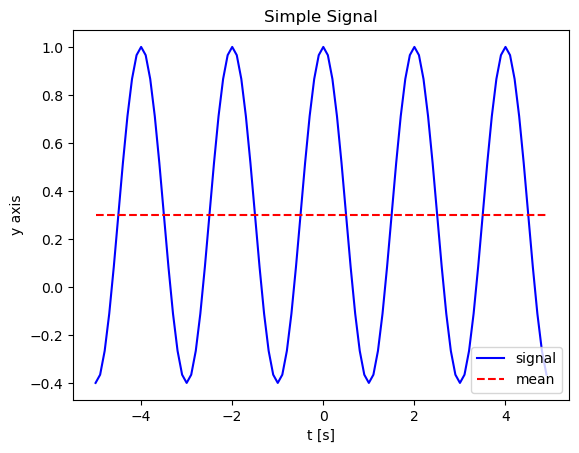

In [9]:
plt.figure()
plt.plot( t, y1, "b" )
plt.plot( t, 0.3*np.ones(N), "--r" )
plt.xlabel( "t [s]" )
plt.ylabel( "y axis" )

plt.title( "Simple Signal" )

plt.legend( ("signal", "mean") )

## Perform Fourier transform on the signal

In [10]:
F1 = np.fft.fft(y1)
len(F1) # same as the length of the signal 
F1[2]

(2.96512894388094e-13-7.05530796520165e-16j)

### Full spectrum

The spectrum `F1` (the result of the Fourier transfrom) is typically an array of complex numbers. To plot it we need to use absolute magnitude.

Text(0.5, 1.0, 'unnormalized full spectrum')

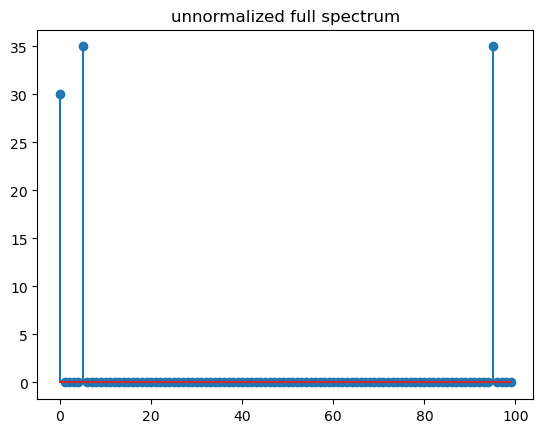

In [11]:
plt.stem(abs(F1))
plt.title('unnormalized full spectrum')

The first term in `F1` indicates the magnitude of the constant term (zero frequency). Dividing by `N` gives us the actual value.

In [12]:
F1[0]/N # equal to the constant bias term specified at the beginning

(0.3000000000000025+0j)

Besides the constant bias `F1[0]`, there are two non-zero pointings in `F1`, indicating the cosine signal itself. The magnitude 0.7 is evenly distributed to two points.

In [13]:
F1[5]/N, F1[N-5]/N # adding up to 0.7

((-0.3499999999999993+1.9510869932068204e-14j),
 (-0.34999999999999937-1.9504152111869144e-14j))

Plotting `F1/N` shows more clearly the magnitude of signals at different frequencies:

Text(0, 0.5, 'signal amplitude')

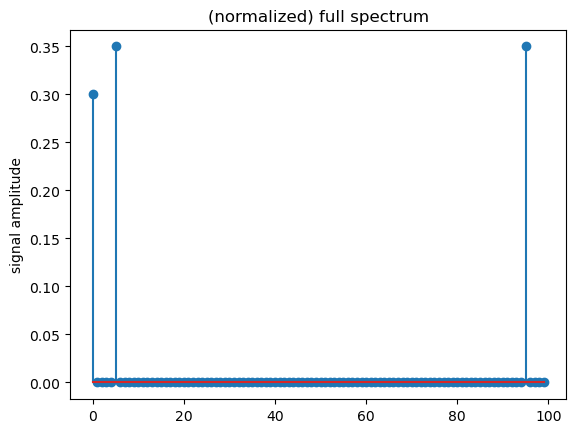

In [14]:
plt.stem(abs(F1)/N)
plt.title('(normalized) full spectrum')
plt.ylabel('signal amplitude')

### Half-sided spectrum

From the matrix $A$ it is easy to show that, the first element `F[0]` in the resulting spectrum is always a real number indicating the constant bias term, while the rest of the array `F[1:]` is symmetric, i.e. `F[1] == F[-1]`, `F[2] == F[-2]`. ( `F[1]` is actually the conjugate of `F[-1]`, but we only care about magnitude here. )

Due to such symmetricity, we can simply plot half of the array (scaled by 2) without loss of information.

Text(0, 0.5, 'signal amplitude')

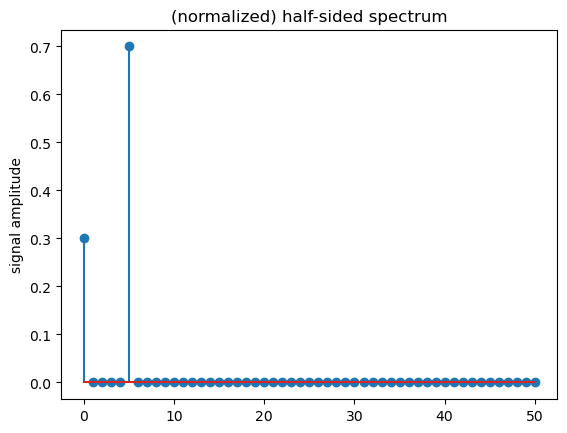

In [15]:
M = N//2 # need to cast to integer if N is an odd number
plt.stem(np.append(abs(F1[0]/N),abs(F1[1:M+1])/N*2))
plt.title('(normalized) half-sided spectrum')
plt.ylabel('signal amplitude')

## Understanding units!

The Discrete Fourier Transform, by defintion, is simply a matrix multiplication which acts on pure numbers. But real physical signals have units. You cannot just treat the resulting array `F1` as some unitless frequency. If the signal is a time series then you need to deal with seconds and hertz; if it is a wave in the space then you need to deal with the wave length in meters. 

In order to understand the unit of the resulting spectrum `F1`, let's look at the original time series `y1` first.

The "time step" of the signal is

In [16]:
dt = t[1]-t[0] # [s]
dt

0.09999999999999964

This is the finest temporal resolution the signal can have. It corresponds the highest frequency:

In [17]:
f_max = 1/dt # [Hz]
f_max

10.000000000000036

On the contrary, the longest time range (`dt*N`, the time span of the entire signal) corresponds to the lowest frequency:

In [18]:
df = f_max/N # [Hz]
df

0.10000000000000035

With the lowest frequency `df` being the "step size" in the frequency axis, the value of the frequency axis is simply the array [0, df, 2*df, ...]. Now we can use correct values and units for the x-axis of the spectrum plot.

Text(0.5, 0, 'frequency [Hz]')

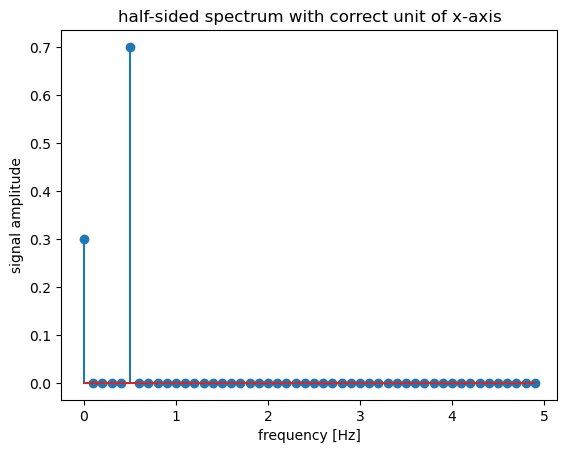

In [19]:
plt.stem(df*np.r_[:M], np.append(abs(F1[0]/N),abs(F1[1:M])/N*2))
plt.title('half-sided spectrum with correct unit of x-axis')
plt.ylabel('signal amplitude')
plt.xlabel('frequency [Hz]')

**The peak is at 0.5 Hz, consistent with our original signal which has a period of 2 s, since 0.5 Hz = 1/(2s). Thus our unit specification is correct.**

## Deal with negative frequency

The right half of the spectrum array (`F1[M+1:]`, not plotted in the above figure) corresponds to negative frequency [-M\*df, ..., -2\*df, -df]. Thus each element in the entire `F1` array corresponds to each element in the frequency array [0, df, 2\*df, ..., M\*df, -M\*df, ..., -2\*df, -df]. 

You can perform `fftshift` on the resulting spectrum `F1` to swap its left and right parts, so it will align with the motonically increasing axis [-M\*df, ..., -2\*df, -df, 0, df, 2\*df, ..., M\*df]. That feels more natural from a mathematical point of view.

Text(0.5, 0, 'frequency [Hz]')

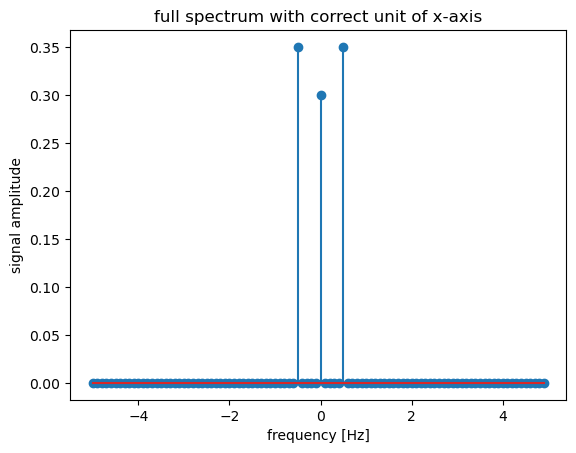

In [20]:
F_shifted = np.fft.fftshift(F1);
plt.stem(df*np.r_[-M:M], abs(F_shifted)/N)
plt.title('full spectrum with correct unit of x-axis')
plt.ylabel('signal amplitude')
plt.xlabel('frequency [Hz]')

## Perform inverse transform

Performing inverse transform is simply `ifft(F1)`. Recall that MATLAB performs the $\frac{1}{N}$ scaling during the inverse transform step.

We use `norm` to check if `ifft(F1)` is close enough to `y1`.

In [ ]:
np.linalg.norm(np.fft.ifft(F1) - y1) # almost zero

# Task-1

Consider the following continuous time signal x(t) consisting of two sinusodials. 

$$
x(t) = sin(2\pi * 1000 * t) + 0.5 *  sin(2\pi * 2000 * t + 3\pi / 4)
$$

## Q1: What is the period of this signal? (10pts)

0.001s

## Q2: What is the minimum sampling frequency we should use? (10pts)

4000Hz

## Q3: Plot five periods of the signal sampled at 64kHz (10 pts)

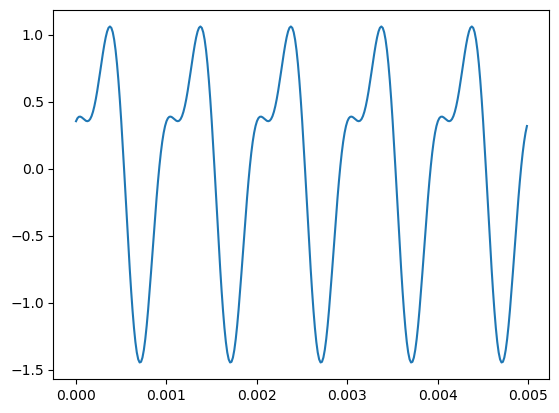

In [60]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(0,0.005,1/64000)
xn = np.sin(2*np.pi*1000*n)+0.5*np.sin(2*np.pi*2000*n+3*(np.pi/4))
plt.plot(n,xn)

## Q4: Perform 8-point DFT of x(t) sampled at 8kHz (10 pts)

Text(0.5, 0, 'frequency [Hz]')

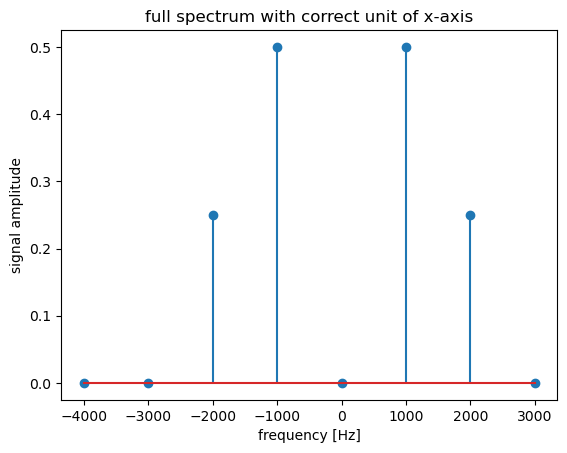

In [61]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(0,0.005,1/8000)
dn=n[1]-n[0]
N=8
f_max = 1/dn
df = f_max/N

#N=len(n)
M=N//2
xn = np.sin(2*np.pi*1000*n)+0.5*np.sin(2*np.pi*2000*n+3*(np.pi/4))
F=np.fft.fft(xn,8)
F_shifted = np.fft.fftshift(F);
plt.stem(df*np.r_[-M:M], abs(F_shifted)/N)
plt.title('full spectrum with correct unit of x-axis')
plt.ylabel('signal amplitude')
plt.xlabel('frequency [Hz]')



## Q5: Perform 64-point DFT of x(t) sampled at 8kHz (10pts)

Text(0.5, 0, 'frequency [Hz]')

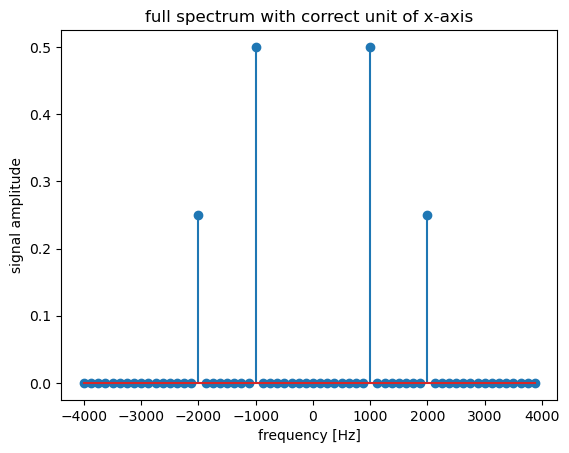

In [66]:
import numpy as np
import matplotlib.pyplot as plt
N=64
n=np.arange(0,0.01,1/8000)
M=N//2
dn=n[1]-n[0]
f_max = 1/dn
df = f_max/N
xn = np.sin(2*np.pi*1000*n)+0.5*np.sin(2*np.pi*2000*n+3*(np.pi/4))
F=np.fft.fft(xn,64)
F_shifted = np.fft.fftshift(F);
plt.stem(df*np.r_[-M:M], abs(F_shifted)/N)
plt.title('full spectrum with correct unit of x-axis')
plt.ylabel('signal amplitude')
plt.xlabel('frequency [Hz]')


## Q6: Comment on your findings between Q4 and Q5. (10 pts)

The figures are same because they both belong to the same fuction. Taking m

# Task-2

An ideal low-pass filter with cutoff frequency Fc can be characterized by the following ideal frequency response. 

![Lowpass Filter](LPFreq.png)

And its impulse response is given by

![Lowpass filter impulse response](IdealLPFilter.png)

Now, consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$ and answer the following questions: 

## Q7: Truncate the impulse response of this filter using rectangular window with length 40, and plot the frequency response of the resulting filter using 512 point FFT. (20 pts)

512

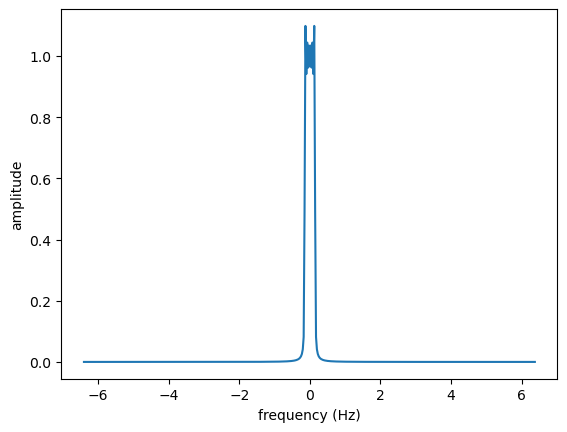

In [109]:
import numpy as np
import matplotlib.pyplot as plt
n = np.r_[-20:20:0.078125]
f = 0.15
y = 2*f*np.sinc(2*f*n)
F1 = np.fft.fft(y)
N = len(n)
M = N//2
dn = n[1]-n[0]
f_max = 1/dn
df = f_max/N
F_shifted = np.fft.fftshift(F1);
F_shifted=F_shifted*40
plt.plot(df*np.r_[-M:M], abs(F_shifted)/N)
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
len(n)

## Q8: Truncate the impulse response of this filter using rectangular window with length 200, and plot the frequency response of the resulting filter using 512 point FFT. (20 pts)

Text(0.5, 0, 'frequency\xa0(Hz)')

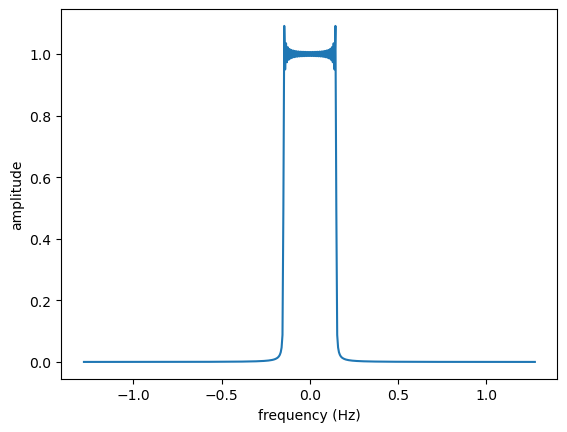

In [110]:
import numpy as np
import matplotlib.pyplot as plt
n = np.r_[-100:100:0.390625]
f = 0.15
y = 2*f*np.sinc(2*f*n)
F1 = np.fft.fft(y)
N = len(n)
M = N//2
dn = n[1]-n[0]
f_max = 1/dn
df = f_max/N
F_shifted = np.fft.fftshift(F1);
F_shifted=F_shifted*200
plt.plot(df*np.r_[-M:M], abs(F_shifted)/N)
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')

## Q9: Comment on what you observe between Q7 and Q8. (20 pts)

widing the window length results in a better filter, with better passband and passreject characteristics.